In [1]:
import scanpy as sc
import pandas as pd
sc.settings.verbosity=2

In [2]:
adata=sc.read("data/adata_raw.h5ad")

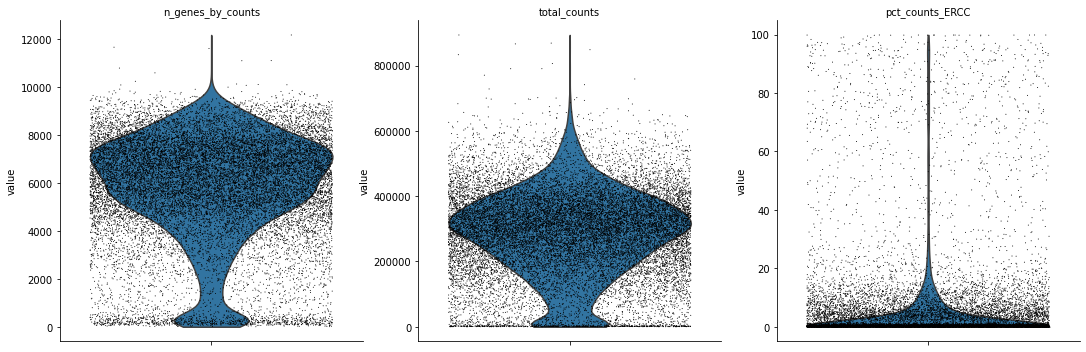

In [3]:
adata.var["ERCC"]=adata.var_names.str.startswith("ERCC")
sc.pp.calculate_qc_metrics(adata,qc_vars=["ERCC"],log1p=False,percent_top=None,inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ERCC'],
             jitter=0.4, multi_panel=True)

In [4]:
adata = adata[adata.obs.n_genes_by_counts < 10000, :]
adata = adata[adata.obs.n_genes_by_counts > 1000, :]
adata = adata[adata.obs.total_counts > 5e4, :]
adata = adata[adata.obs.total_counts < 6e5, :]
adata = adata[adata.obs.pct_counts_ERCC < 15, :]

In [5]:
adata=adata[:,~adata.var.ERCC]

In [6]:
adata.write("data/adata_QC_filtered.h5ad")

In [7]:
import scFates as scf

In [8]:
sc.pp.filter_genes(adata,min_cells=3)

filtered out 1762 genes that are detected in less than 3 cells


Trying to set attribute `.var` of view, copying.


In [9]:
sc.pp.normalize_total(adata,target_sum=1e3)

normalizing counts per cell
    finished (0:00:00)


Finding overdispersed features
    computing mean and variances
    gam fitting
    found 7073 over-dispersed features (0:00:03) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



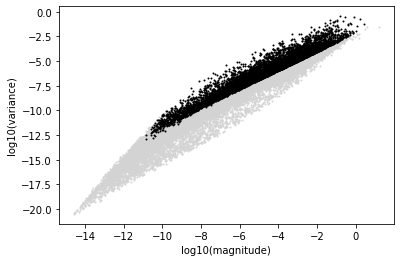

In [10]:
sc.pp.log1p(adata)
scf.pp.find_overdispersed(adata,plot=True)

In [11]:
adata.layers["scaled"]=sc.pp.scale(adata.X,max_value=10,copy=True)
adata.obsm["X_pca"]=sc.pp.pca(adata[:,adata.var.highly_variable].layers["scaled"])

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:07)


In [12]:
sc.pp.neighbors(adata,n_neighbors=30,n_pcs=30,metric="cosine")

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:30)


In [13]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

computing UMAP
    finished (0:00:06)
running Leiden clustering
    finished (0:00:01)


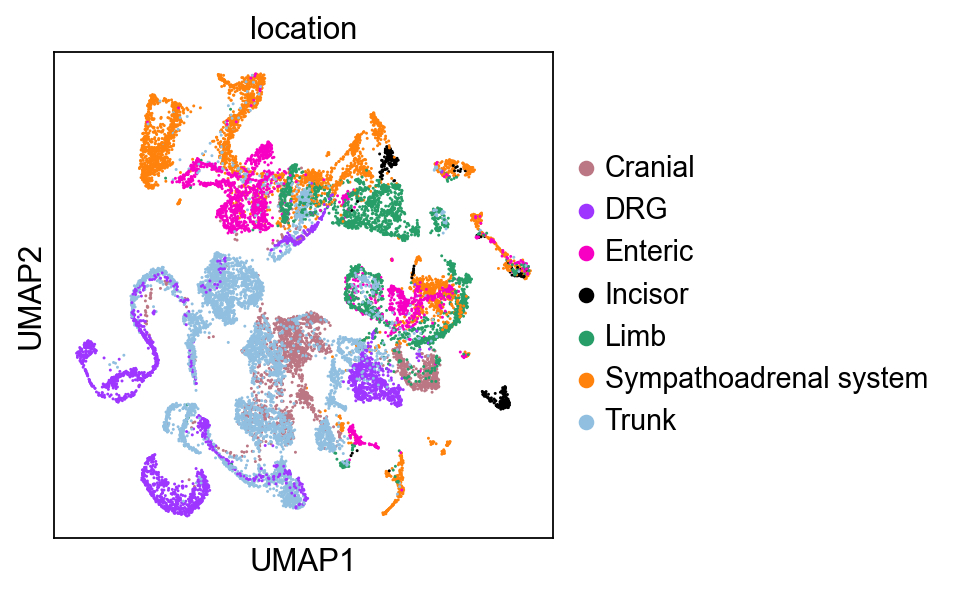

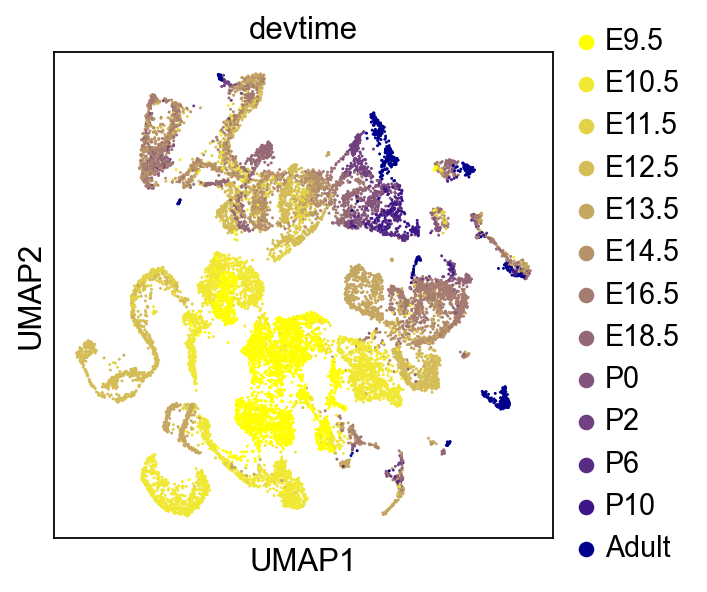

In [14]:
sc.set_figure_params()
sc.pl.umap(adata,color="location",palette=["#BB7784","#9E36FF","#F700C3","black","#279e68","#FF820C","#90bfe0"])
adata.obs.devtime=adata.obs.devtime.cat.reorder_categories(['E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5', 'E14.5', 'E16.5','E18.5', 'P0', 'P2', 'P6', 'P10', 'Adult'])
sc.pl.umap(adata,color="devtime",palette=["#FFFF00","#F1E834","#E3D248",
                                          "#D4BC56","#C5A761","#B69169",
                                          "#A67C70","#956876","#83547C",
                                          "#704080","#592C84","#3D1788","#00008B"])

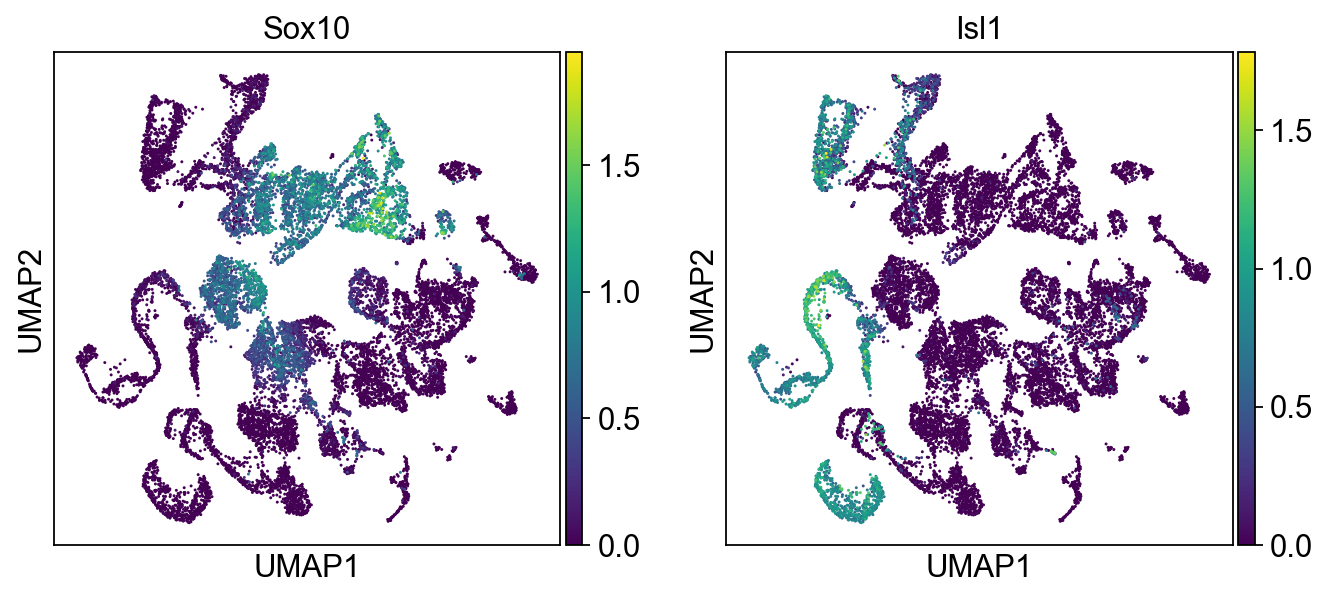

In [15]:
sc.pl.umap(adata,color=["Sox10","Isl1"])

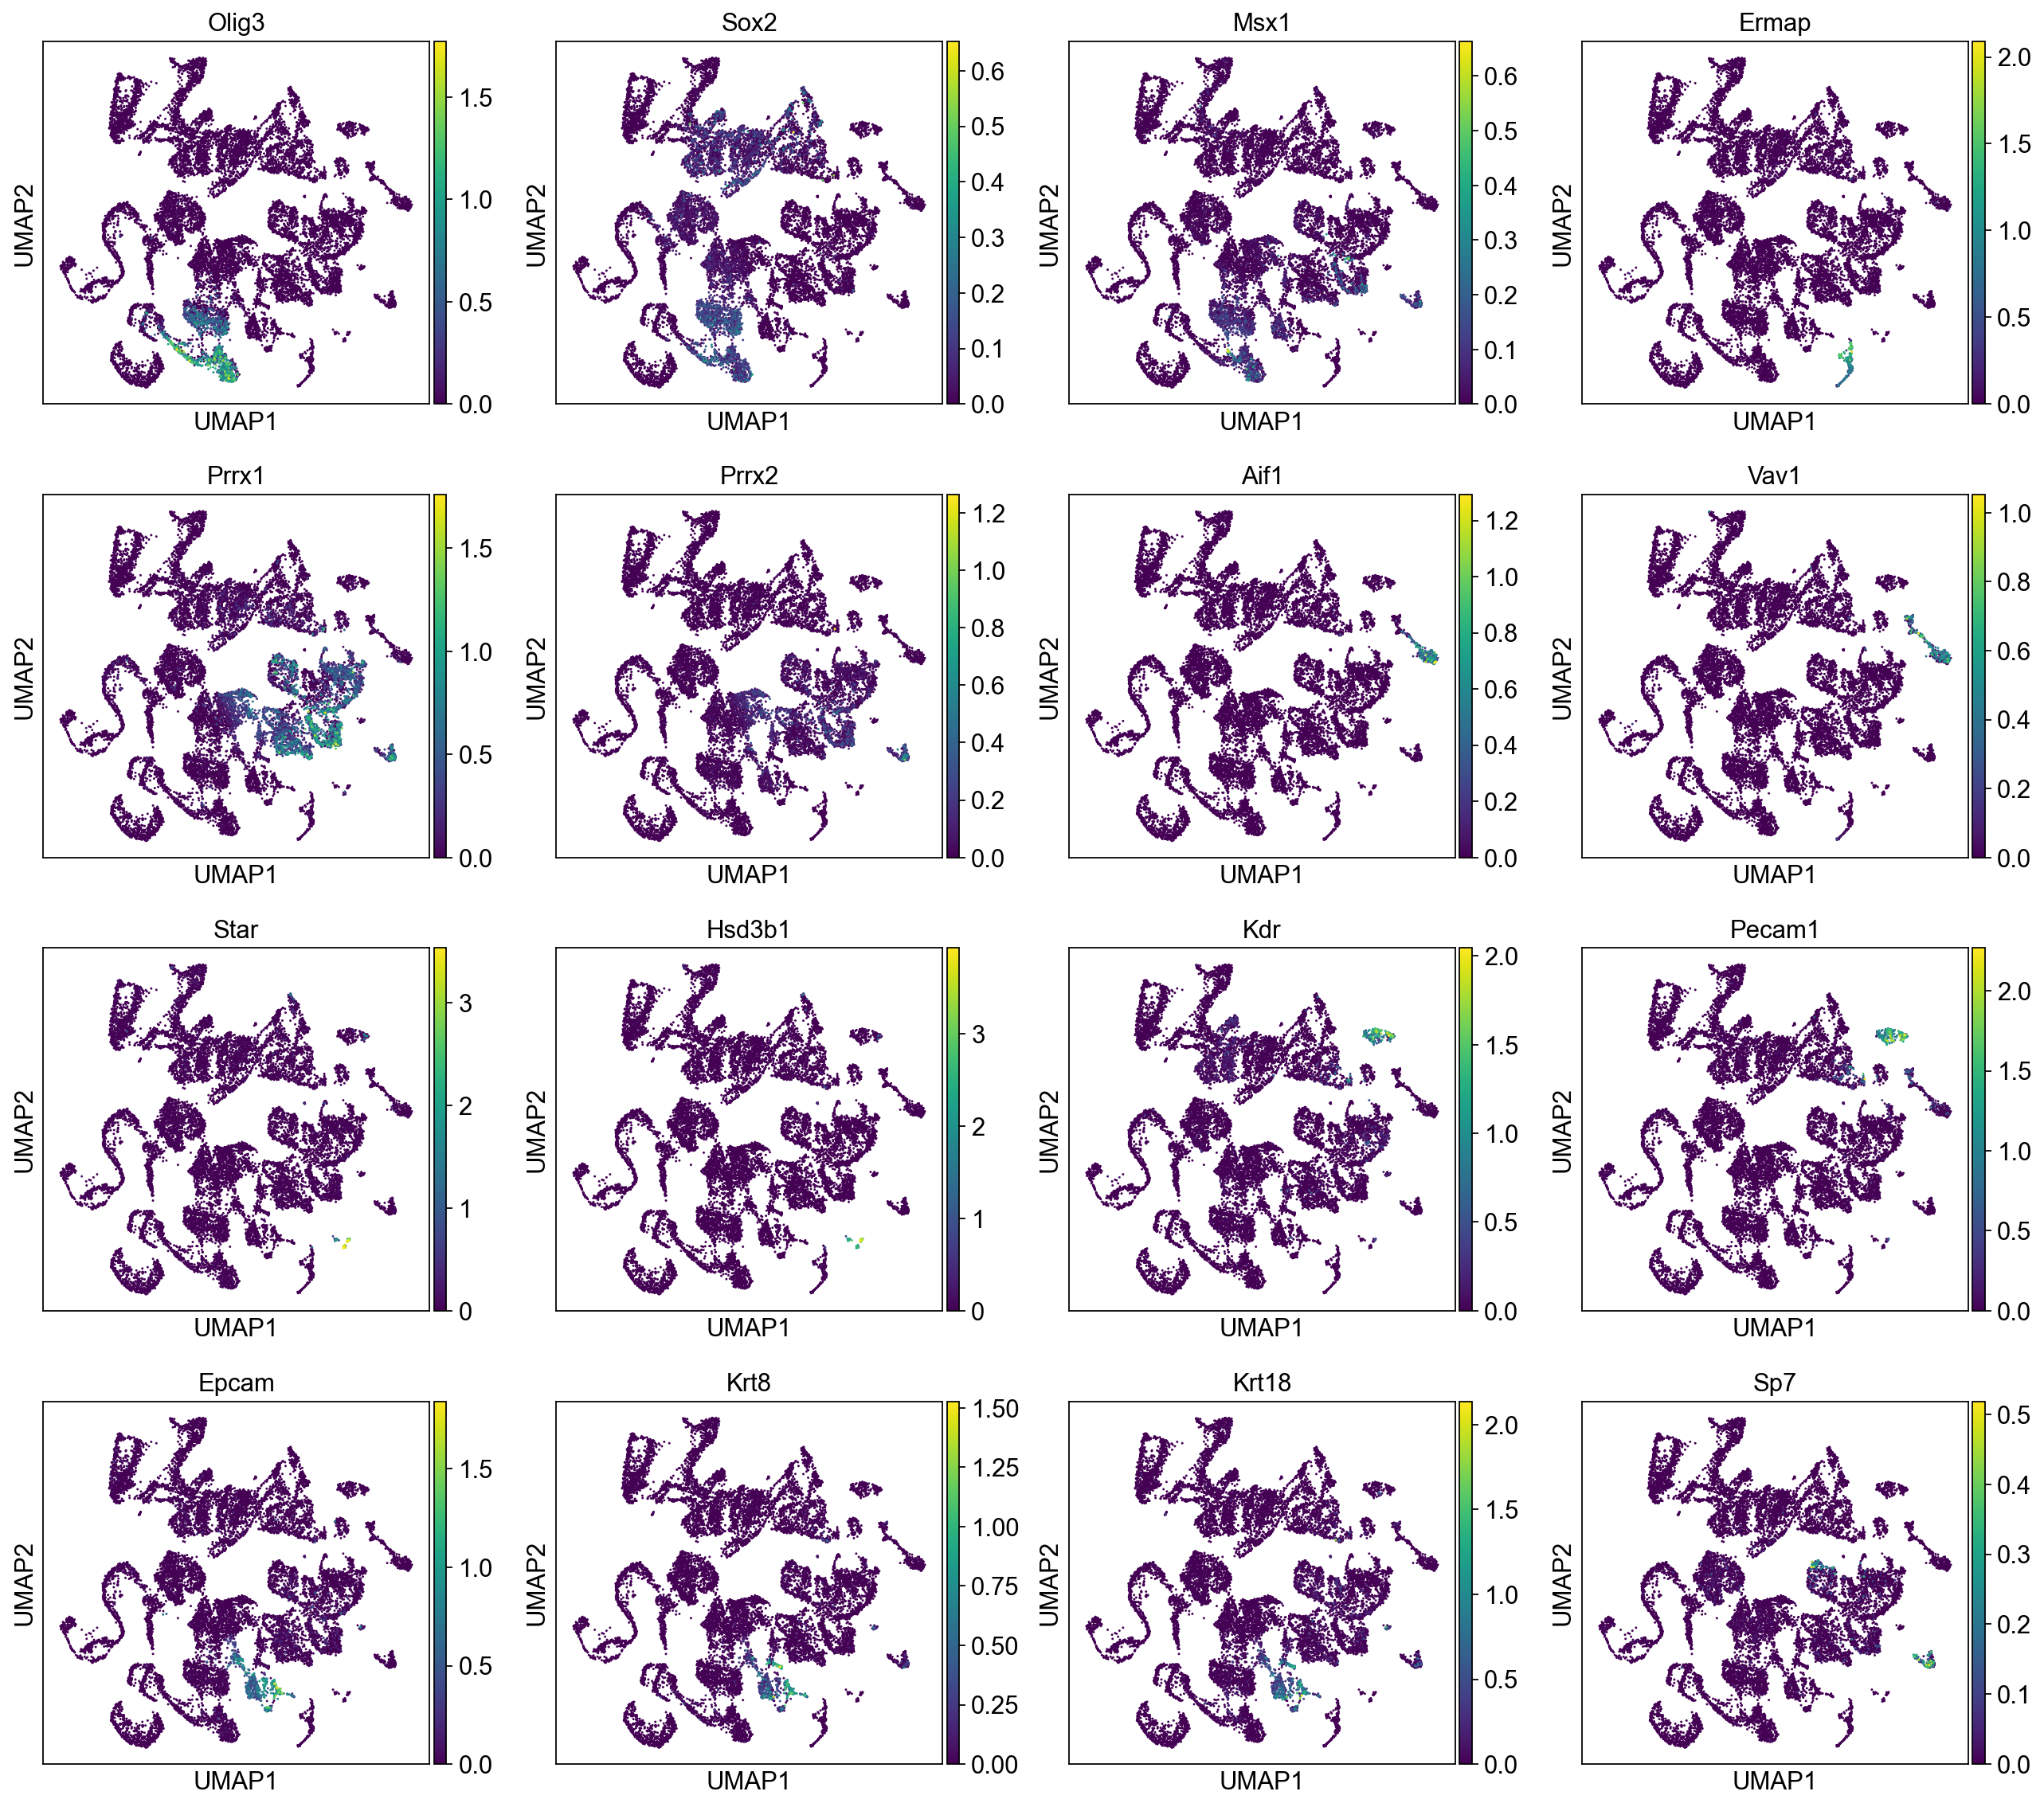

In [16]:
sc.pl.umap(adata,color=["Olig3","Sox2","Msx1","Ermap","Prrx1","Prrx2","Aif1","Vav1","Star","Hsd3b1","Kdr","Pecam1","Epcam","Krt8","Krt18","Sp7"])

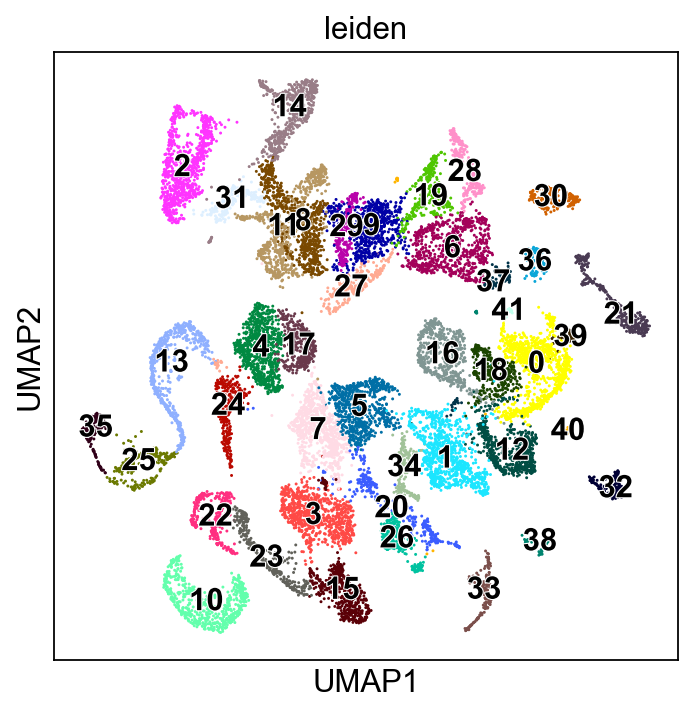

In [23]:
sc.set_figure_params(figsize=(5,5))
sc.pl.umap(adata,color="leiden",legend_loc="on data",legend_fontoutline=True)

In [17]:
import numpy as np
selection=np.array([2,31,14,11,8,29,9,27,19,6,28,37,36,4,17,7,5,13,24],dtype=str)

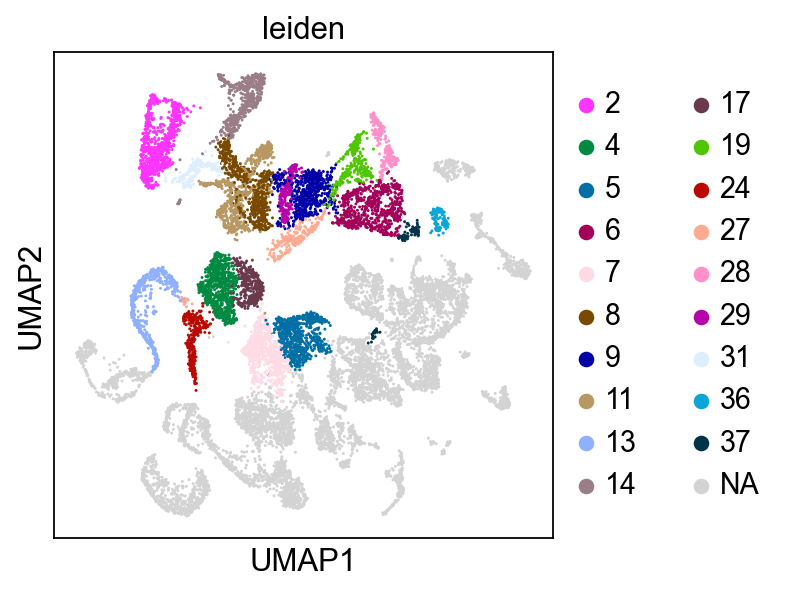

In [18]:
sc.pl.umap(adata,color="leiden",groups=selection.tolist(),legend_fontoutline=True)

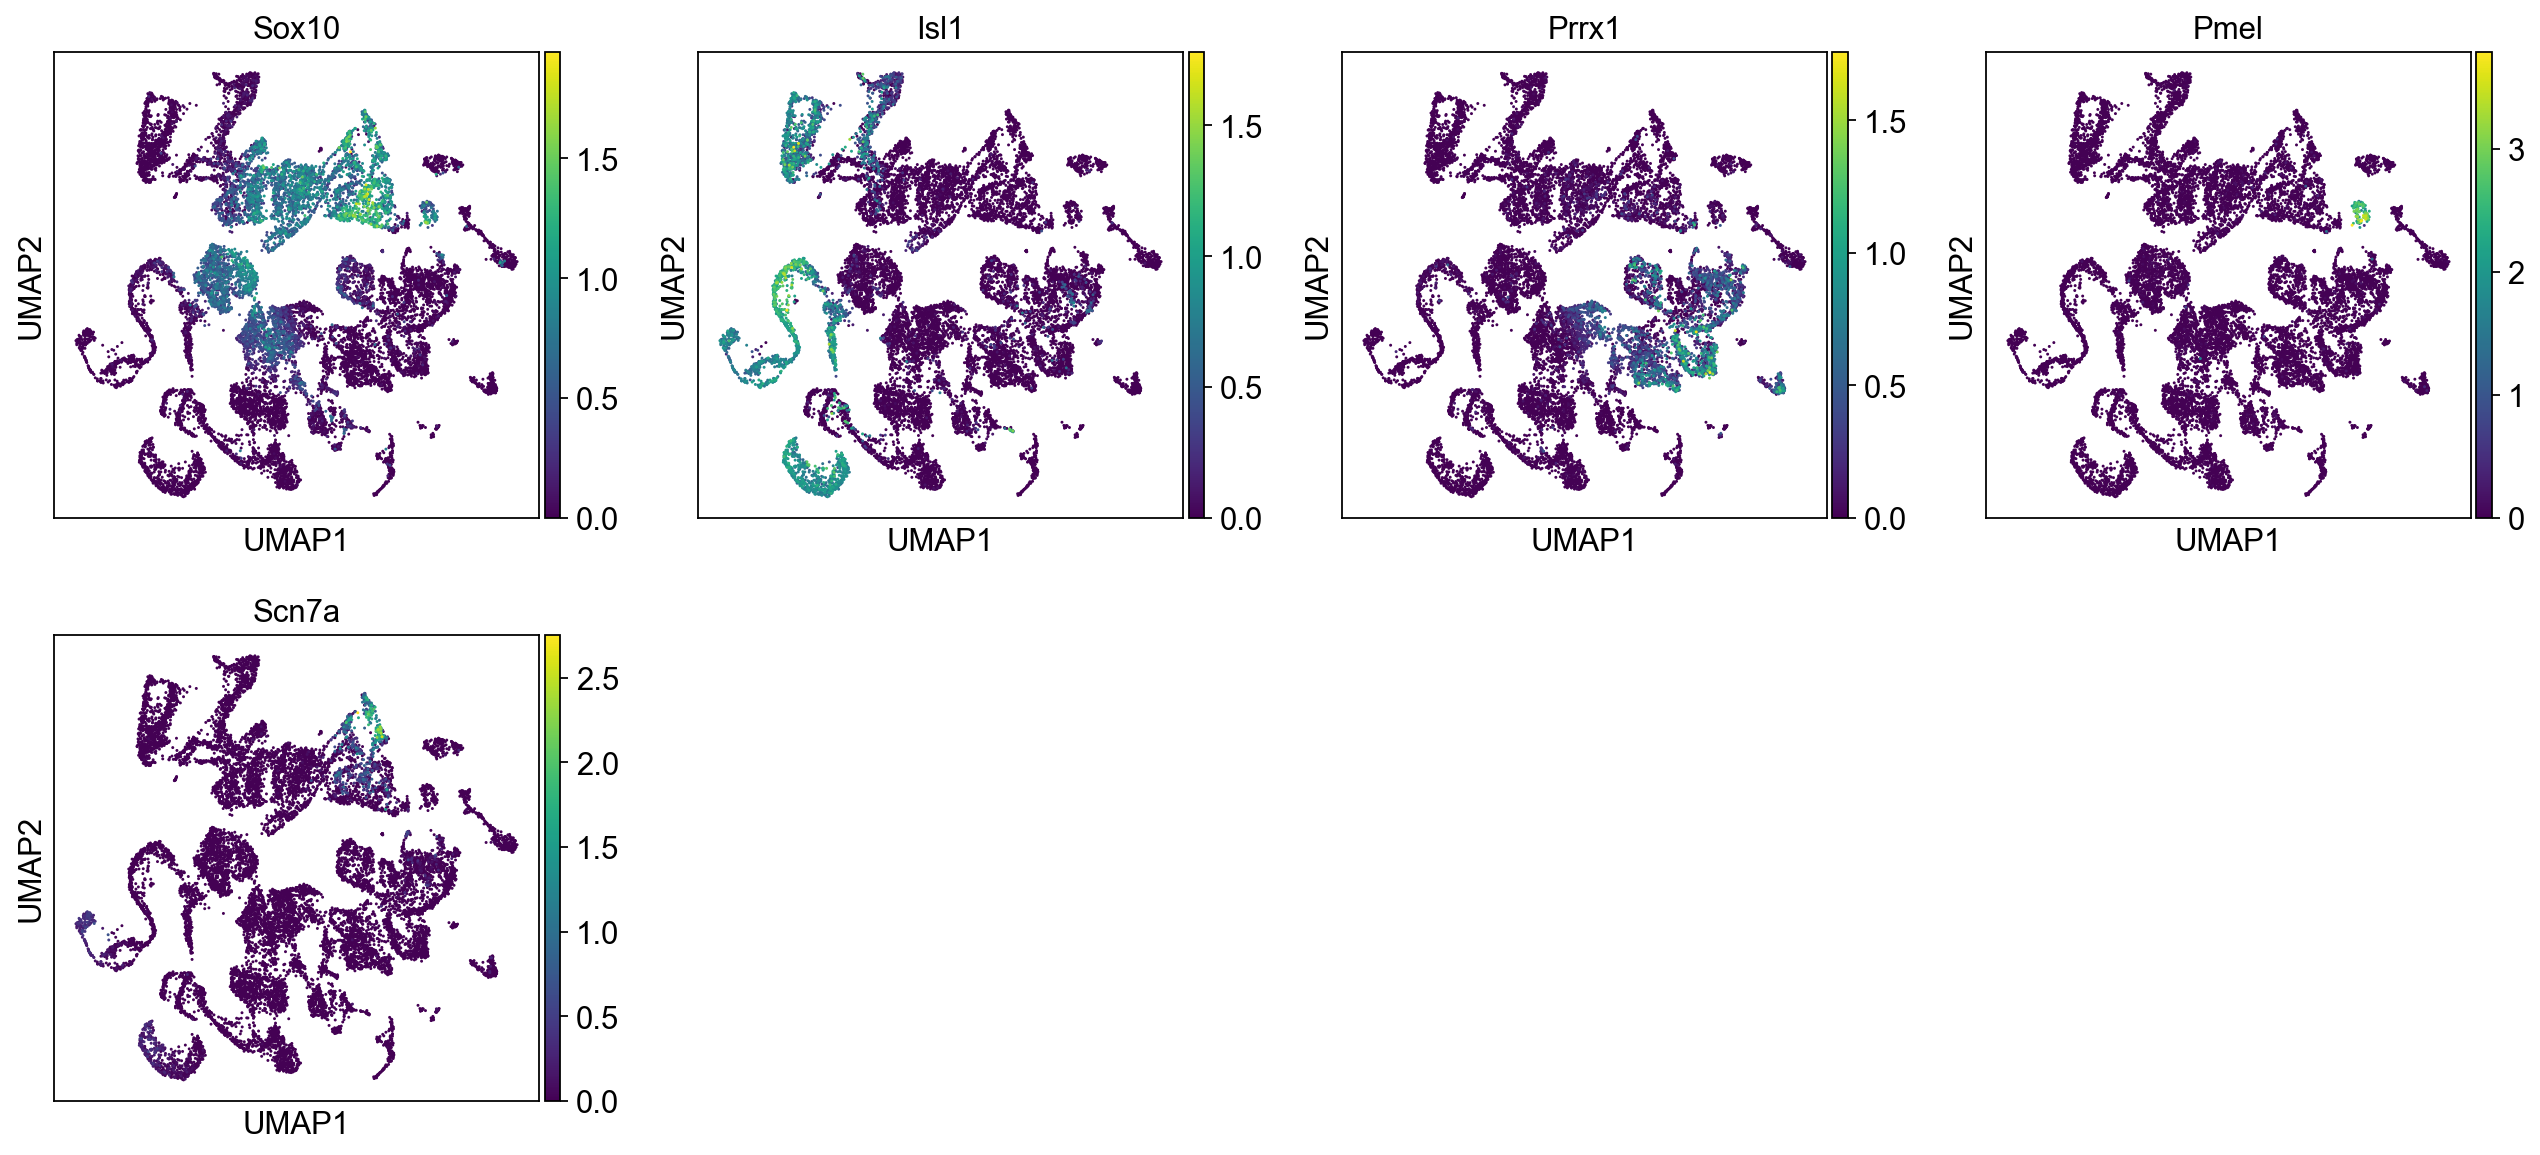

In [19]:
sc.pl.umap(adata,color=["Sox10","Isl1","Prrx1","Pmel","Scn7a"])

In [20]:
adata.write("data/adata_QC_leiden.h5ad")

In [21]:
adata_raw=sc.read("data/adata_QC_filtered.h5ad")

In [22]:
adata=adata_raw[adata.obs.leiden.isin(selection)]

In [23]:
adata.write("data/adata_glia_raw.h5ad")